In [1]:
%pylab inline
from BB2tile import *
from dataset import Dataset

Populating the interactive namespace from numpy and matplotlib


In [2]:
img_info,object_tbl,bb_info,hit_info = load_info()
obj_lst = list(set(object_tbl.object_id))

In [3]:
my_BBG  = pd.read_csv("../my_ground_truth.csv")

In [4]:
object_id = 18
ground_truth_match = my_BBG[my_BBG.object_id==object_id]
BBG =  Polygon(zip(*process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])))
tiles, objIndicatorMat = createObjIndicatorMatrix(object_id)
T_true =BBG.area

In [5]:
tile_dataset = Dataset(tiles,objIndicatorMat,100)

In [ ]:
solution = greedySearch(tile_dataset)
solution.printSolution()

In [8]:
Ta, La, solutionLista = experiment_avg(objIndicatorMat)
Tm, Lm, solutionListm = experiment_median(objIndicatorMat)

In [ ]:
Tl, Ll, solutionListl = experiment_local(5000, objIndicatorMat)

In [10]:
from shapely.ops import cascaded_union

In [11]:
def join_tiles(solutionList,tiles):
    return cascaded_union([Polygon(tiles[tidx]) for tidx in solutionList])

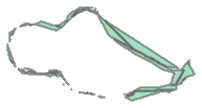

In [35]:
join_tiles(solutionLista,tiles)

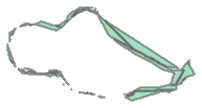

In [39]:
join_tiles(solutionListm,tiles)